<a href="https://colab.research.google.com/github/sabumjung/Tensorflow/blob/master/06-MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 머신러닝 학습의 Hello World 와 같은 MNIST(손글씨 숫자 인식) 문제를 신경망으로 풀어봅니다.
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
# 텐서플로우에 기본 내장된 mnist 모듈을 이용하여 데이터를 로드합니다.
# 지정한 폴더에 MNIST 데이터가 없는 경우 자동으로 데이터를 다운로드합니다.
# one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어줍니다.
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
# 입력 값의 차원은 [배치크기, 특성값] 으로 되어 있습니다.
# 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784개의 특성값으로 정합니다.
X = tf.placeholder(tf.float32, [None, 784])
# 결과는 0~9 의 10 가지 분류를 가집니다.
Y = tf.placeholder(tf.float32, [None, 10])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [16]:
#label이 onehot encoding잘되었는지 확인
#2번째 label은 4임 따라서 0, 0, 0, 0, 1으로 표현되어야 함
print(mnist.train.labels[1])
#image데이터 확인(flat형태로 잘되었는지 확인)
print(mnist.train.images[1]) 

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.     

784


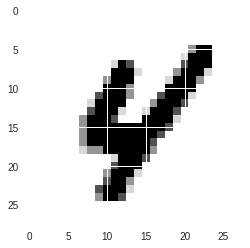

In [14]:
# MNIST의 훈련용 데이터셋을 그림으로 표시하기
import numpy as np

print(mnist.train.images.shape[1])
arr = np.array(mnist.train.images[1])
arr.shape = (28, 28)

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(arr)

In [0]:
# 신경망의 레이어는 다음처럼 구성합니다.
# 784(입력 특성값)
#   -> 256 (히든레이어 뉴런 갯수) -> 256 (히든레이어 뉴런 갯수)
#   -> 10 (결과값 0~9 분류)
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됩니다.
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [22]:
#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해
        # 지정한 크기인 배치크기 만큼 학습할 데이터를 가져옵니다.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')


Epoch: 0001 Avg. cost = 0.400
Epoch: 0002 Avg. cost = 0.146
Epoch: 0003 Avg. cost = 0.094
Epoch: 0004 Avg. cost = 0.070
Epoch: 0005 Avg. cost = 0.051
Epoch: 0006 Avg. cost = 0.040
Epoch: 0007 Avg. cost = 0.032
Epoch: 0008 Avg. cost = 0.024
Epoch: 0009 Avg. cost = 0.022
Epoch: 0010 Avg. cost = 0.019
Epoch: 0011 Avg. cost = 0.018
Epoch: 0012 Avg. cost = 0.012
Epoch: 0013 Avg. cost = 0.013
Epoch: 0014 Avg. cost = 0.012
Epoch: 0015 Avg. cost = 0.011
Epoch: 0016 Avg. cost = 0.009
Epoch: 0017 Avg. cost = 0.011
Epoch: 0018 Avg. cost = 0.011
Epoch: 0019 Avg. cost = 0.008
Epoch: 0020 Avg. cost = 0.010
Epoch: 0021 Avg. cost = 0.008
Epoch: 0022 Avg. cost = 0.007
Epoch: 0023 Avg. cost = 0.009
Epoch: 0024 Avg. cost = 0.005
Epoch: 0025 Avg. cost = 0.006
Epoch: 0026 Avg. cost = 0.011
Epoch: 0027 Avg. cost = 0.006
Epoch: 0028 Avg. cost = 0.005
Epoch: 0029 Avg. cost = 0.008
Epoch: 0030 Avg. cost = 0.004
최적화 완료!


In [4]:
#########
# 결과 확인
######
# model 로 예측한 값과 실제 레이블인 Y의 값을 비교합니다.
# tf.argmax 함수를 이용해 예측한 값에서 가장 큰 값을 예측한 레이블이라고 평가합니다.
# 예) [0.1 0 0 0.7 0 0.2 0 0 0 0] -> 3
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))


정확도: 0.9815
